In [1]:
import numpy as np

import pandas as pd

import pymc3 as pm

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from modules.stats import GLMMPerformance

In [2]:
def sns_styleset():
    sns.set(context='paper', style='ticks')
    matplotlib.rcParams['figure.dpi']        = 300
    matplotlib.rcParams['axes.linewidth']    = .75
    matplotlib.rcParams['xtick.major.width'] = .75
    matplotlib.rcParams['ytick.major.width'] = .75
    matplotlib.rcParams['xtick.major.size']  = 3
    matplotlib.rcParams['ytick.major.size']  = 3
    matplotlib.rcParams['xtick.minor.size']  = 2
    matplotlib.rcParams['ytick.minor.size']  = 2
    matplotlib.rcParams['font.size']         = 9
    matplotlib.rcParams['axes.titlesize']    = 9
    matplotlib.rcParams['axes.labelsize']    = 9
    matplotlib.rcParams['legend.fontsize']   = 9
    matplotlib.rcParams['xtick.labelsize']   = 9
    matplotlib.rcParams['ytick.labelsize']   = 9
    
sns_styleset()

In [3]:
TUNERS_REMAP = {
    'rs': 'Random Search',
    'gp': 'Gaussian Process',
    'hb': 'HyperBand'
    
}
SOURCE_REMAP = {
    'mn_v': 'Vanilla \n MNIST',
    'mn_b': 'Noise \n MNIST',
    'mn_r': 'Rotated \n MNIST',
    'mn_rb': 'Rotated \n + \n Noise \n MNIST',
}
METRIC_REMAP = {
    'acc': 'Accuracy',
    'f1': 'F1 Score',
    'precision': 'Precision',
    'recall': 'Recall',
    'time': 'Execution Time',
    'n_conf': 'Explored Configurations'
}

df = pd.read_csv('results\\tables\\models_results.csv')
tuners_df = []
for source in df['source'].unique():
    
    tuners_df.append(
        pd.read_csv(f'results\\tables\\tuners_results_{source}.csv')
    )
tuners_df = pd.concat(tuners_df)
df = df.merge(tuners_df, how='inner', on=['tuner', 'source'])


df['tuner'] = df['tuner'].map(TUNERS_REMAP)
df['source'] = df['source'].map(SOURCE_REMAP)

melted = pd.melt(df, id_vars=['tuner', 'source'], var_name='metric')
melted['metric'] = melted['metric'].map(METRIC_REMAP)
melted=melted.rename(columns={'tuner': 'Tuner', 'source': 'Source'})

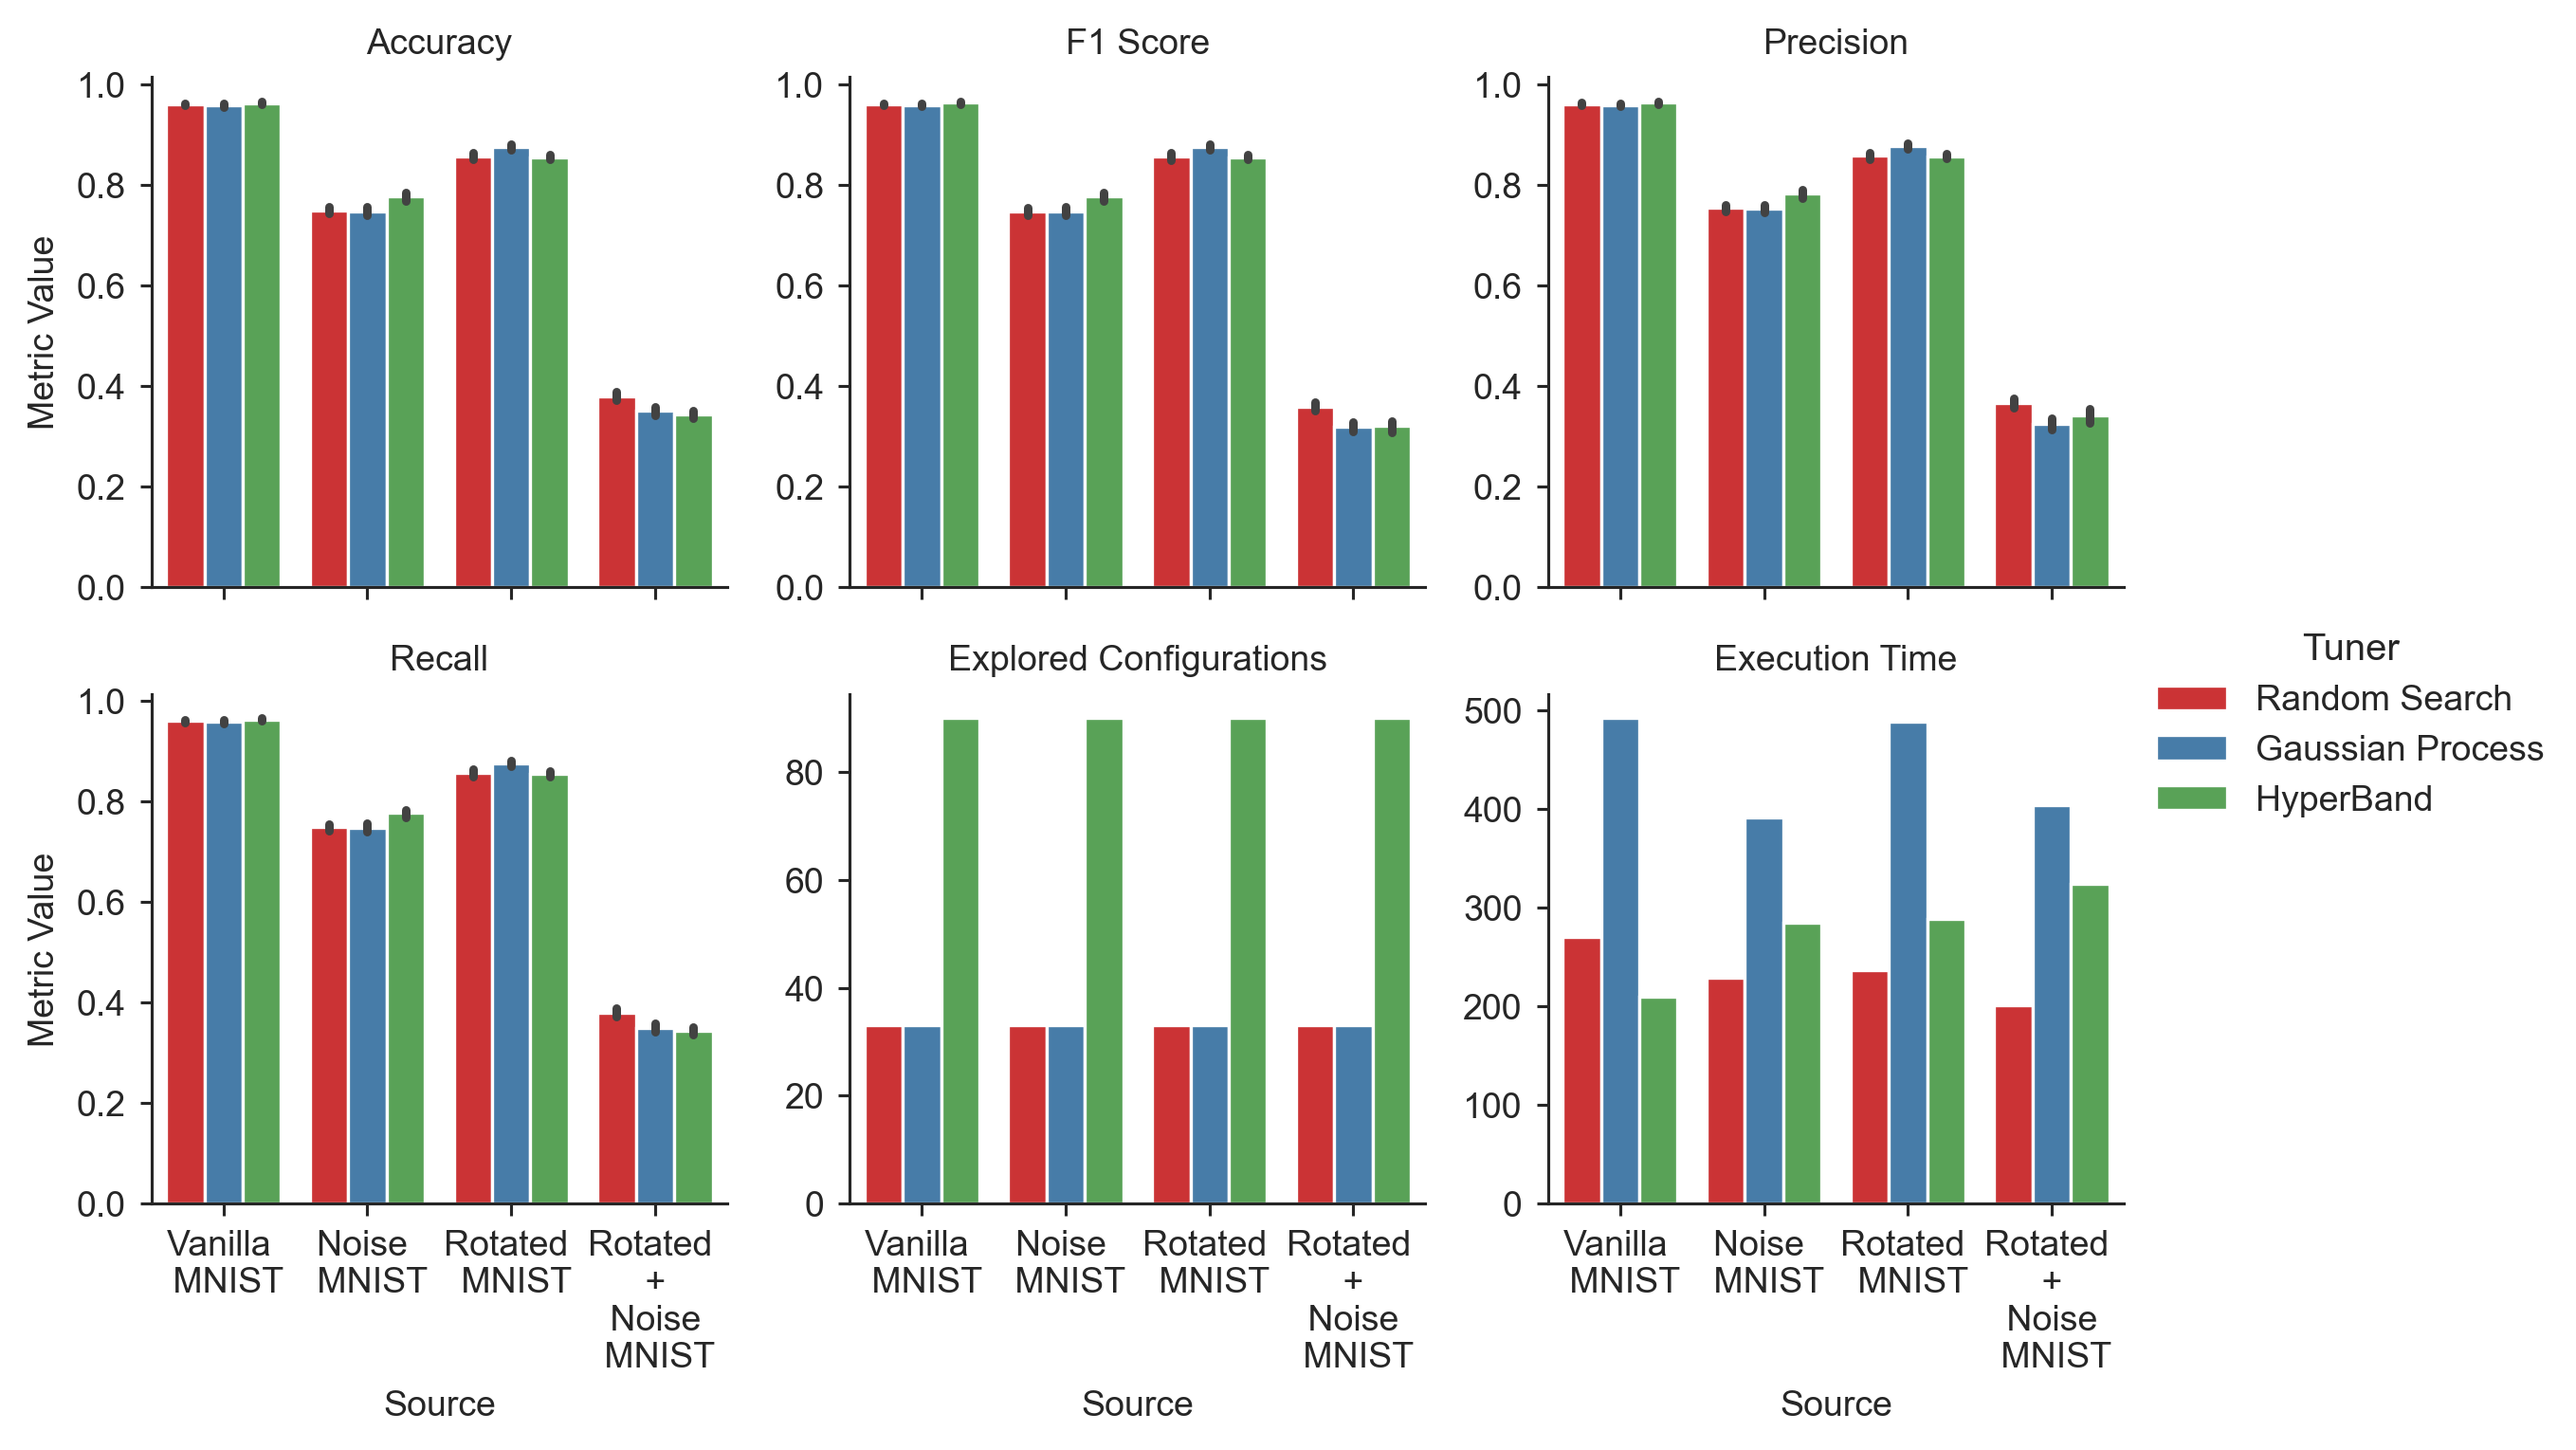

In [4]:
box_plots = sns.catplot(
    x='Source', 
    y='value', 
    col='metric',
    kind='bar',
    data=melted,
    col_wrap=3,
    height=2.5,
    sharey=False,
    sharex=True,
    hue='Tuner',
    palette='Set1'
)
box_plots.set_titles('{col_name}')
box_plots.set_ylabels('Metric Value')
plt.savefig('results\\figures\\tuners_perfromance.png')
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Tuner, Context, hyper_sigma, hyper_normal]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 262 seconds.
The number of effective samples is smaller than 25% for some parameters.


Accuracy
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Tuner[0]  0.150  0.069   0.023    0.285      0.002    0.001    1802.0  1802.0   
Tuner[1]  0.147  0.069   0.017    0.279      0.002    0.001    1800.0  1800.0   
Tuner[2]  0.149  0.069   0.020    0.282      0.002    0.001    1800.0  1800.0   

          ess_bulk  ess_tail  r_hat  
Tuner[0]    1792.0    2165.0    1.0  
Tuner[1]    1791.0    2162.0    1.0  
Tuner[2]    1789.0    2196.0    1.0  


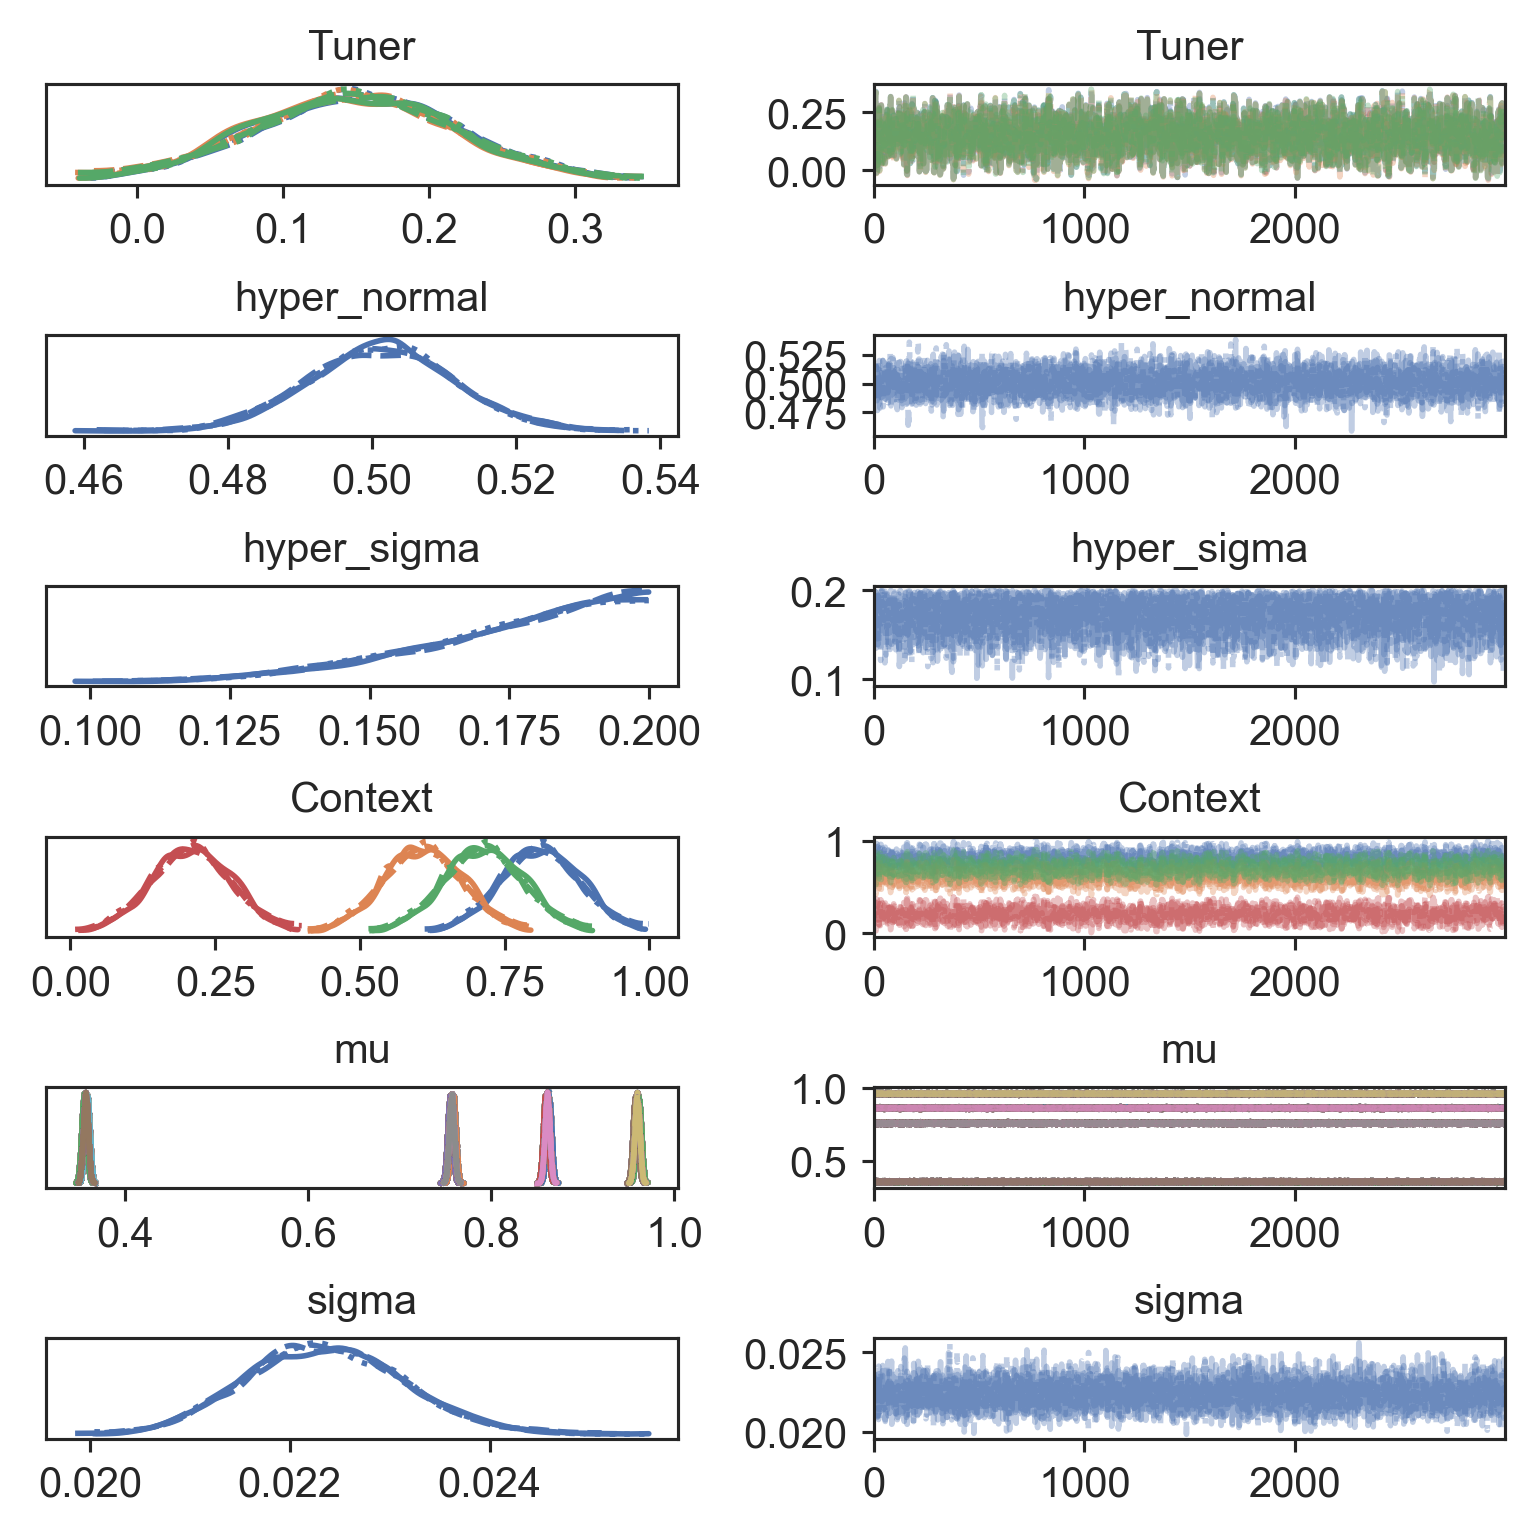

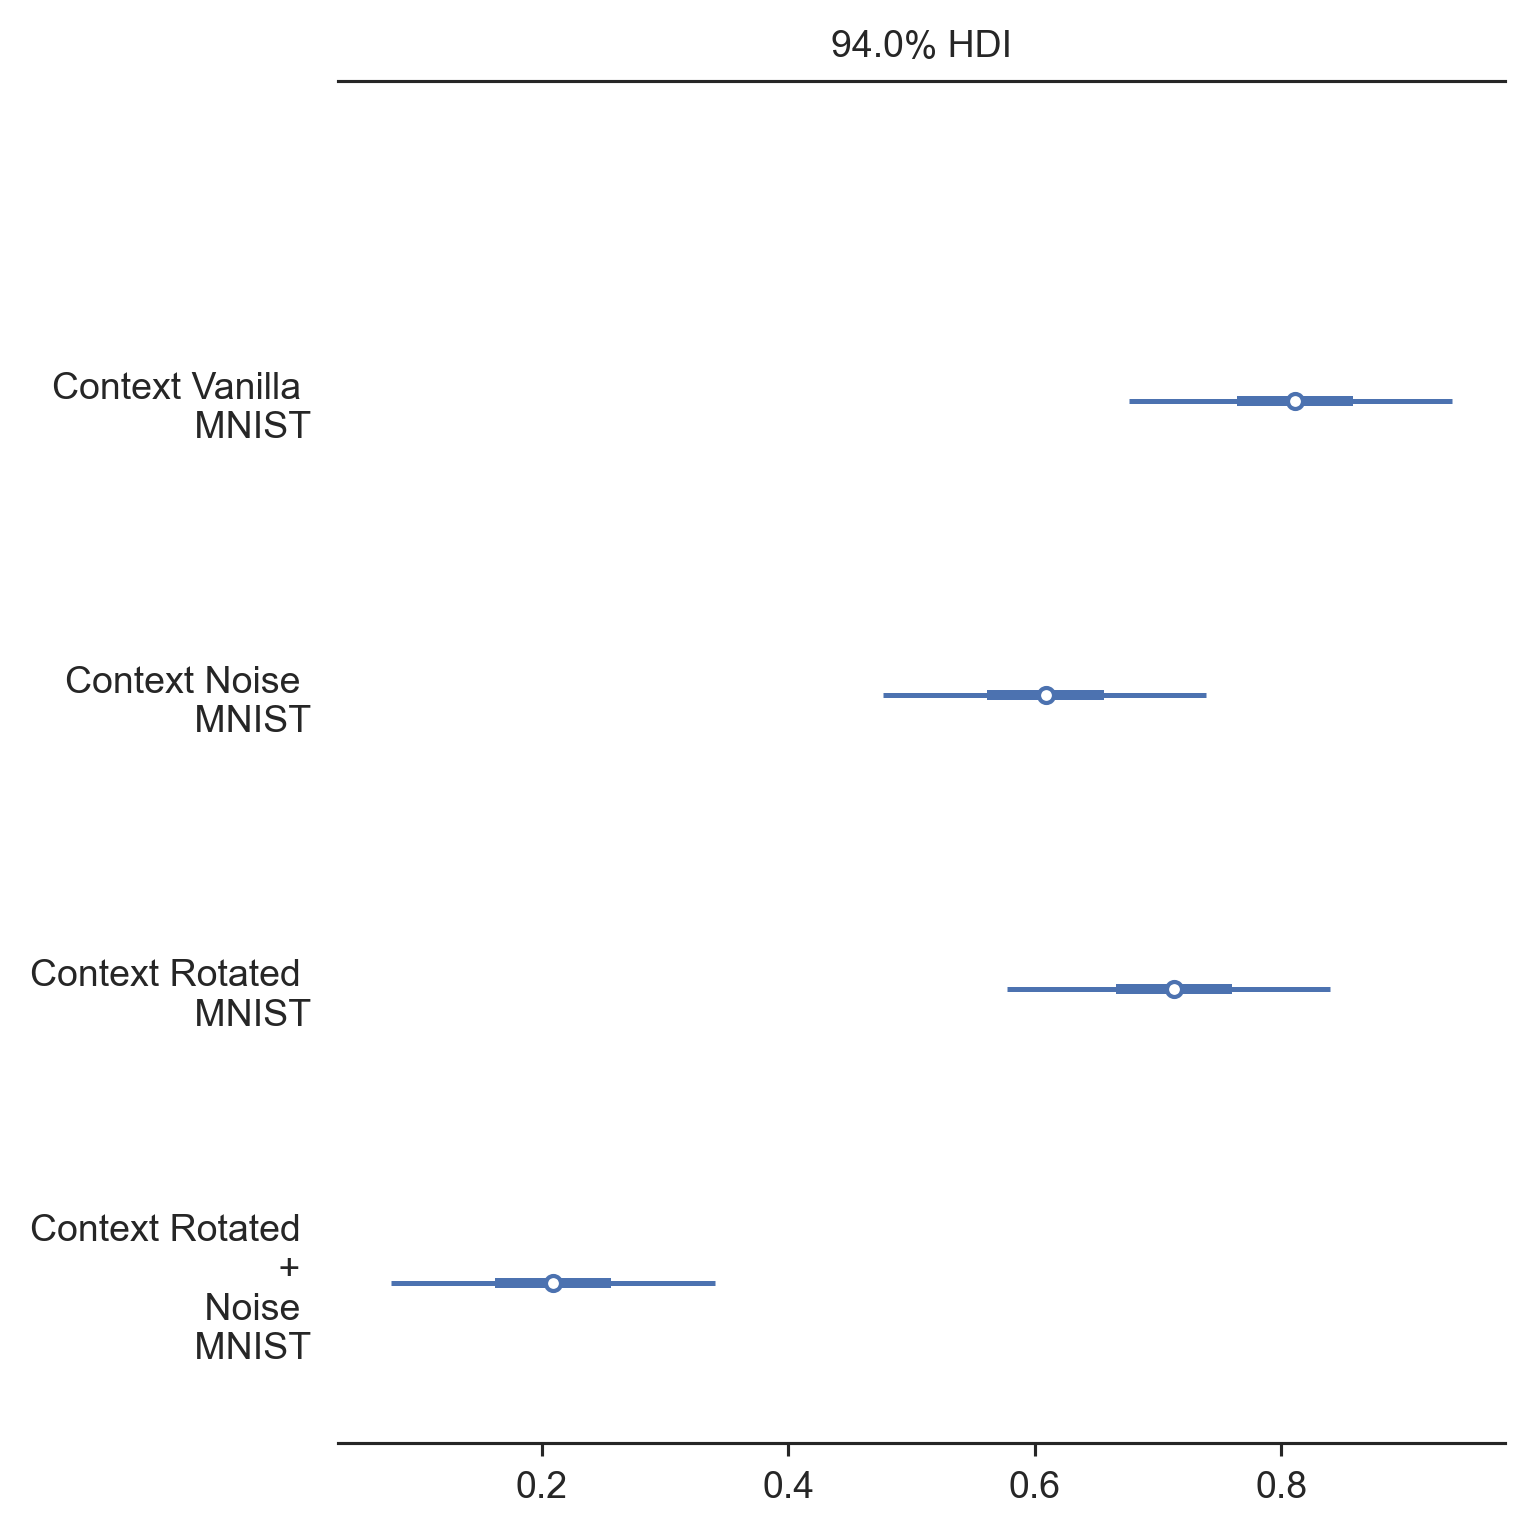

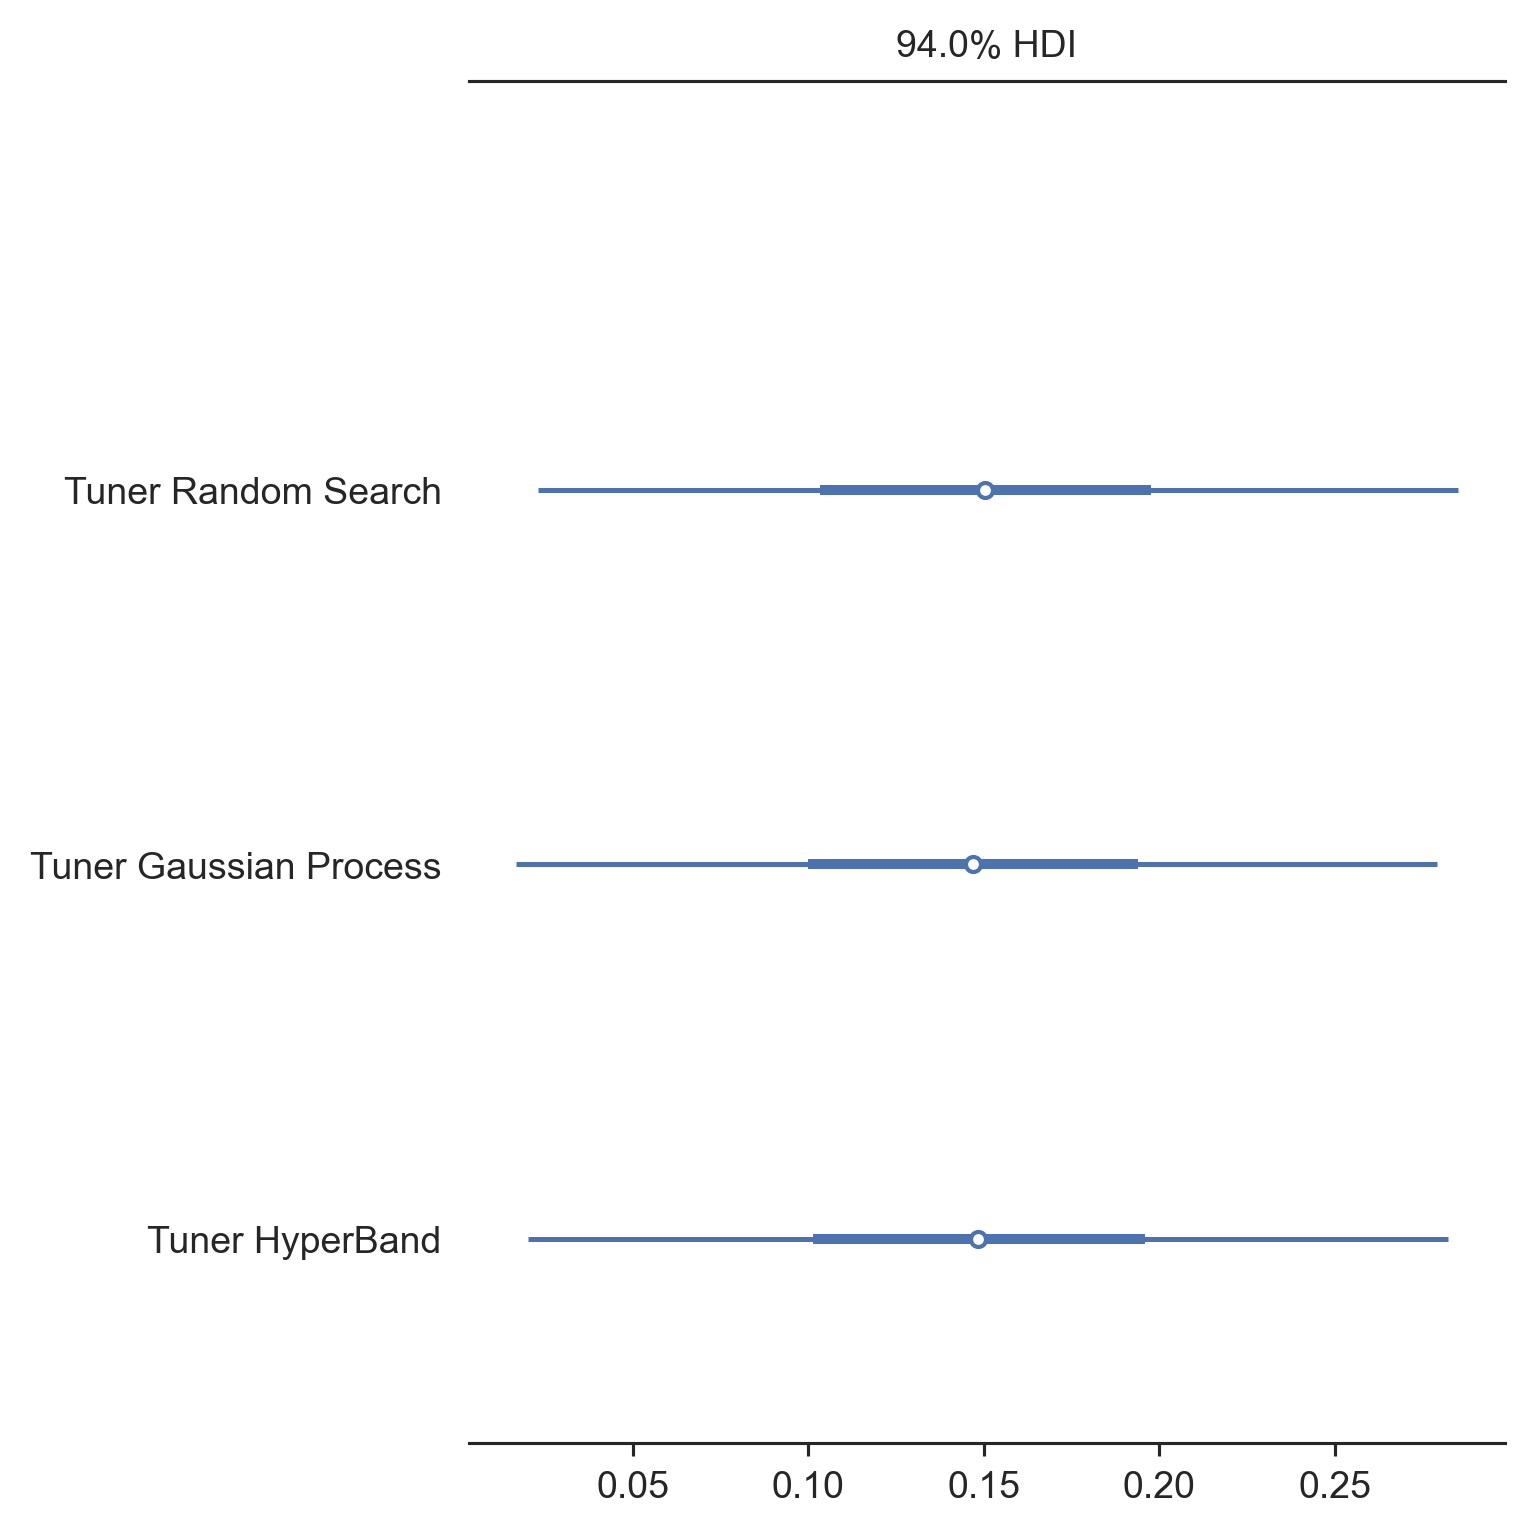

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Tuner, Context, hyper_sigma, hyper_normal]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 220 seconds.
The number of effective samples is smaller than 25% for some parameters.


Precision
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Tuner[0]  0.149  0.069   0.021    0.283      0.002    0.001    1837.0  1837.0   
Tuner[1]  0.142  0.069   0.015    0.277      0.002    0.001    1847.0  1847.0   
Tuner[2]  0.150  0.069   0.018    0.281      0.002    0.001    1844.0  1844.0   

          ess_bulk  ess_tail  r_hat  
Tuner[0]    1802.0    2189.0    1.0  
Tuner[1]    1819.0    2190.0    1.0  
Tuner[2]    1816.0    2257.0    1.0  


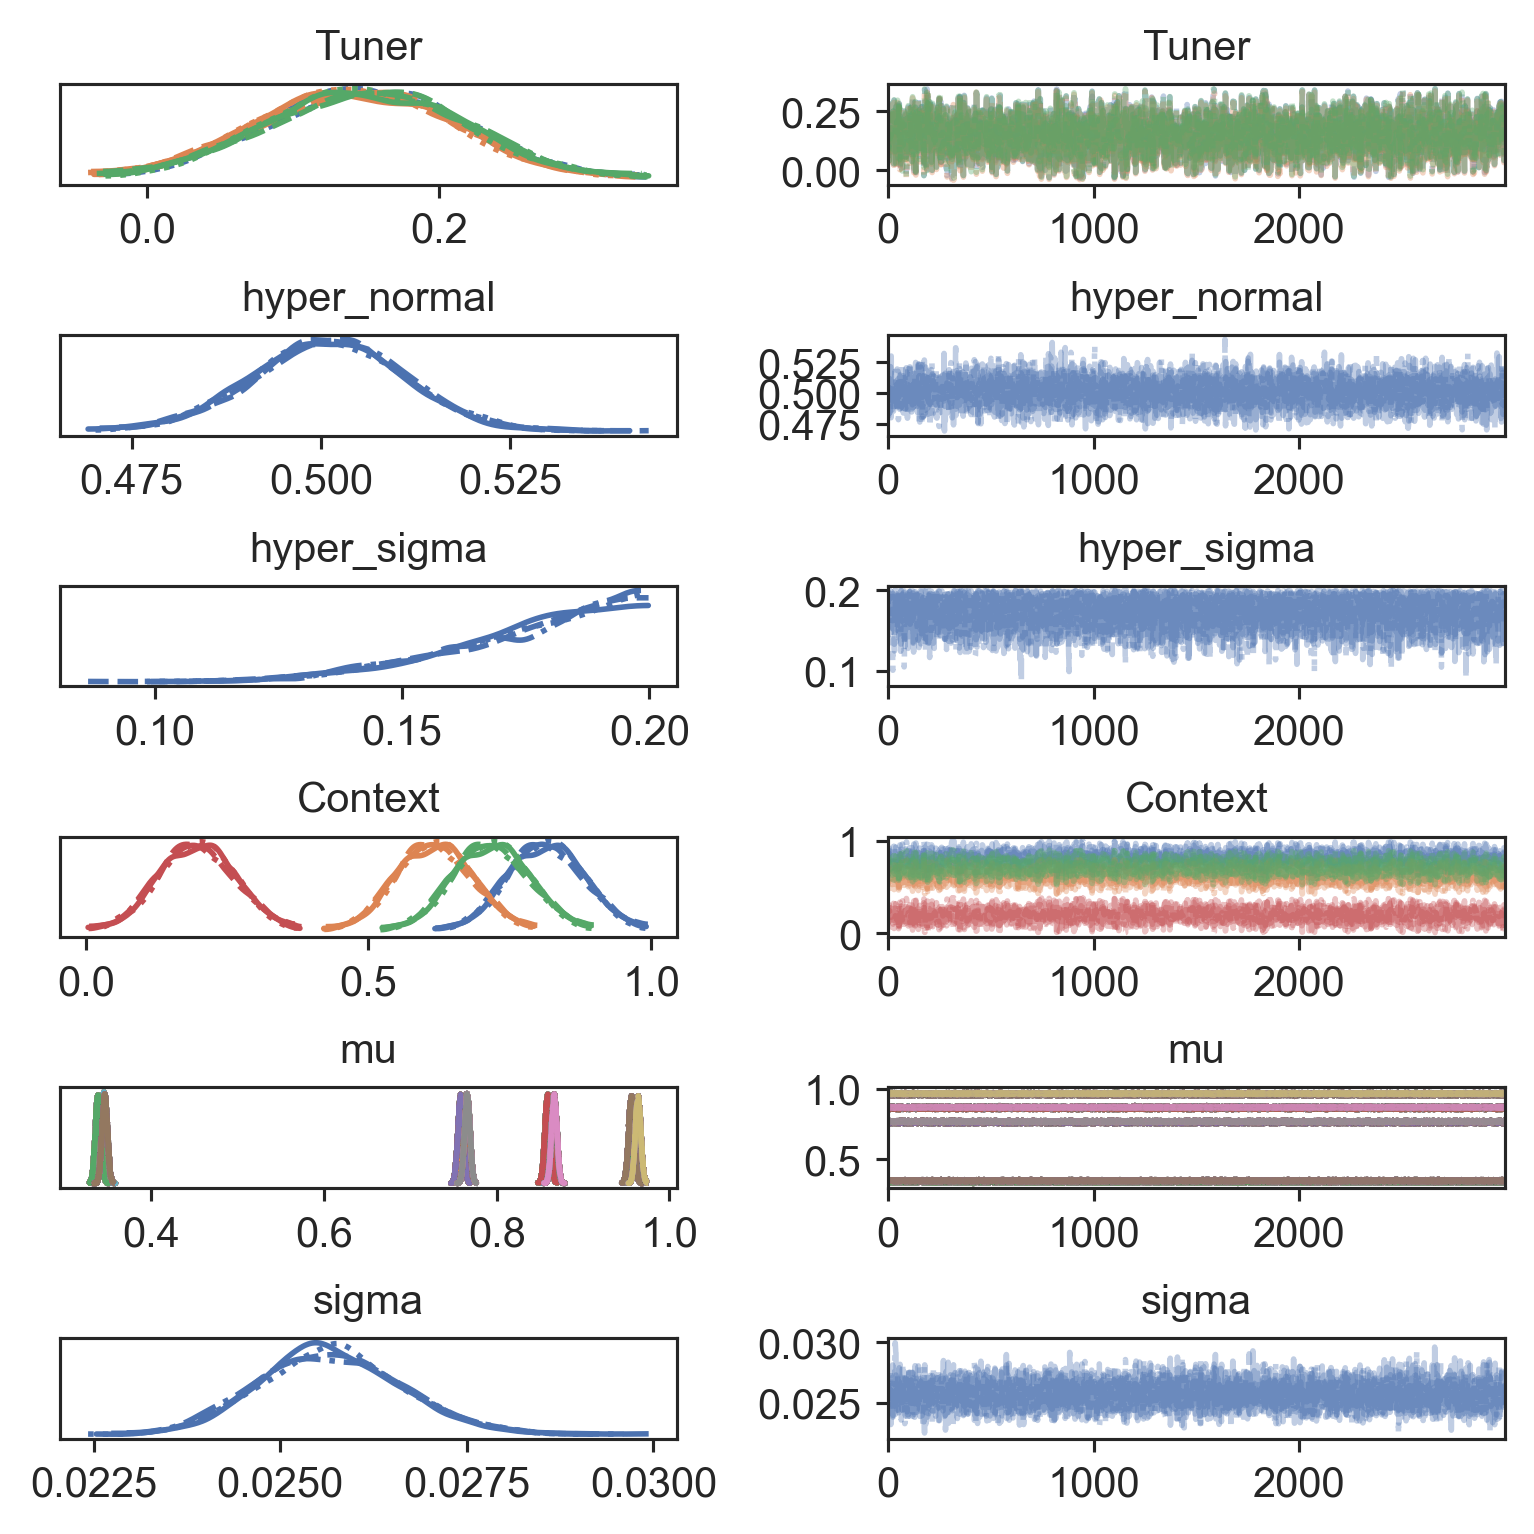

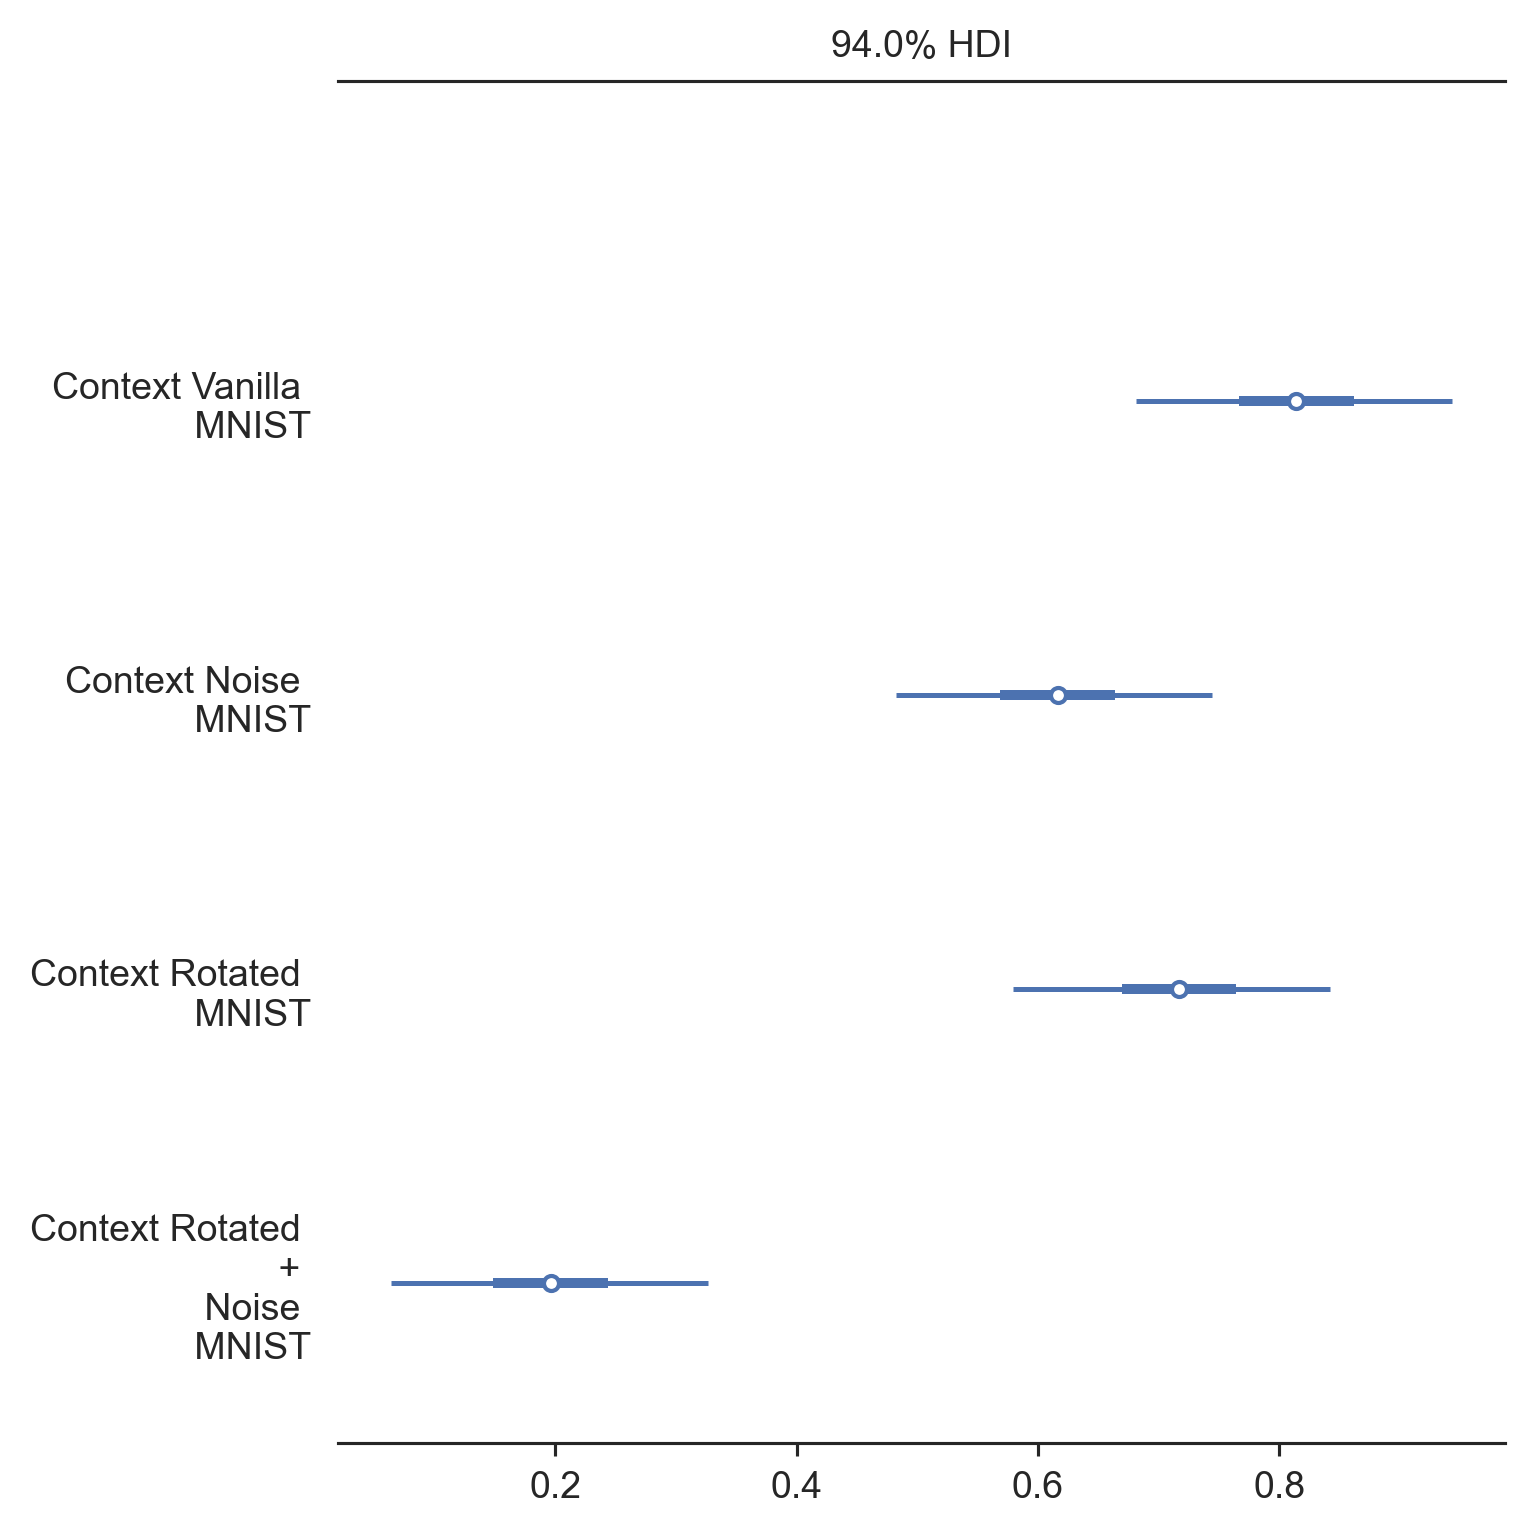

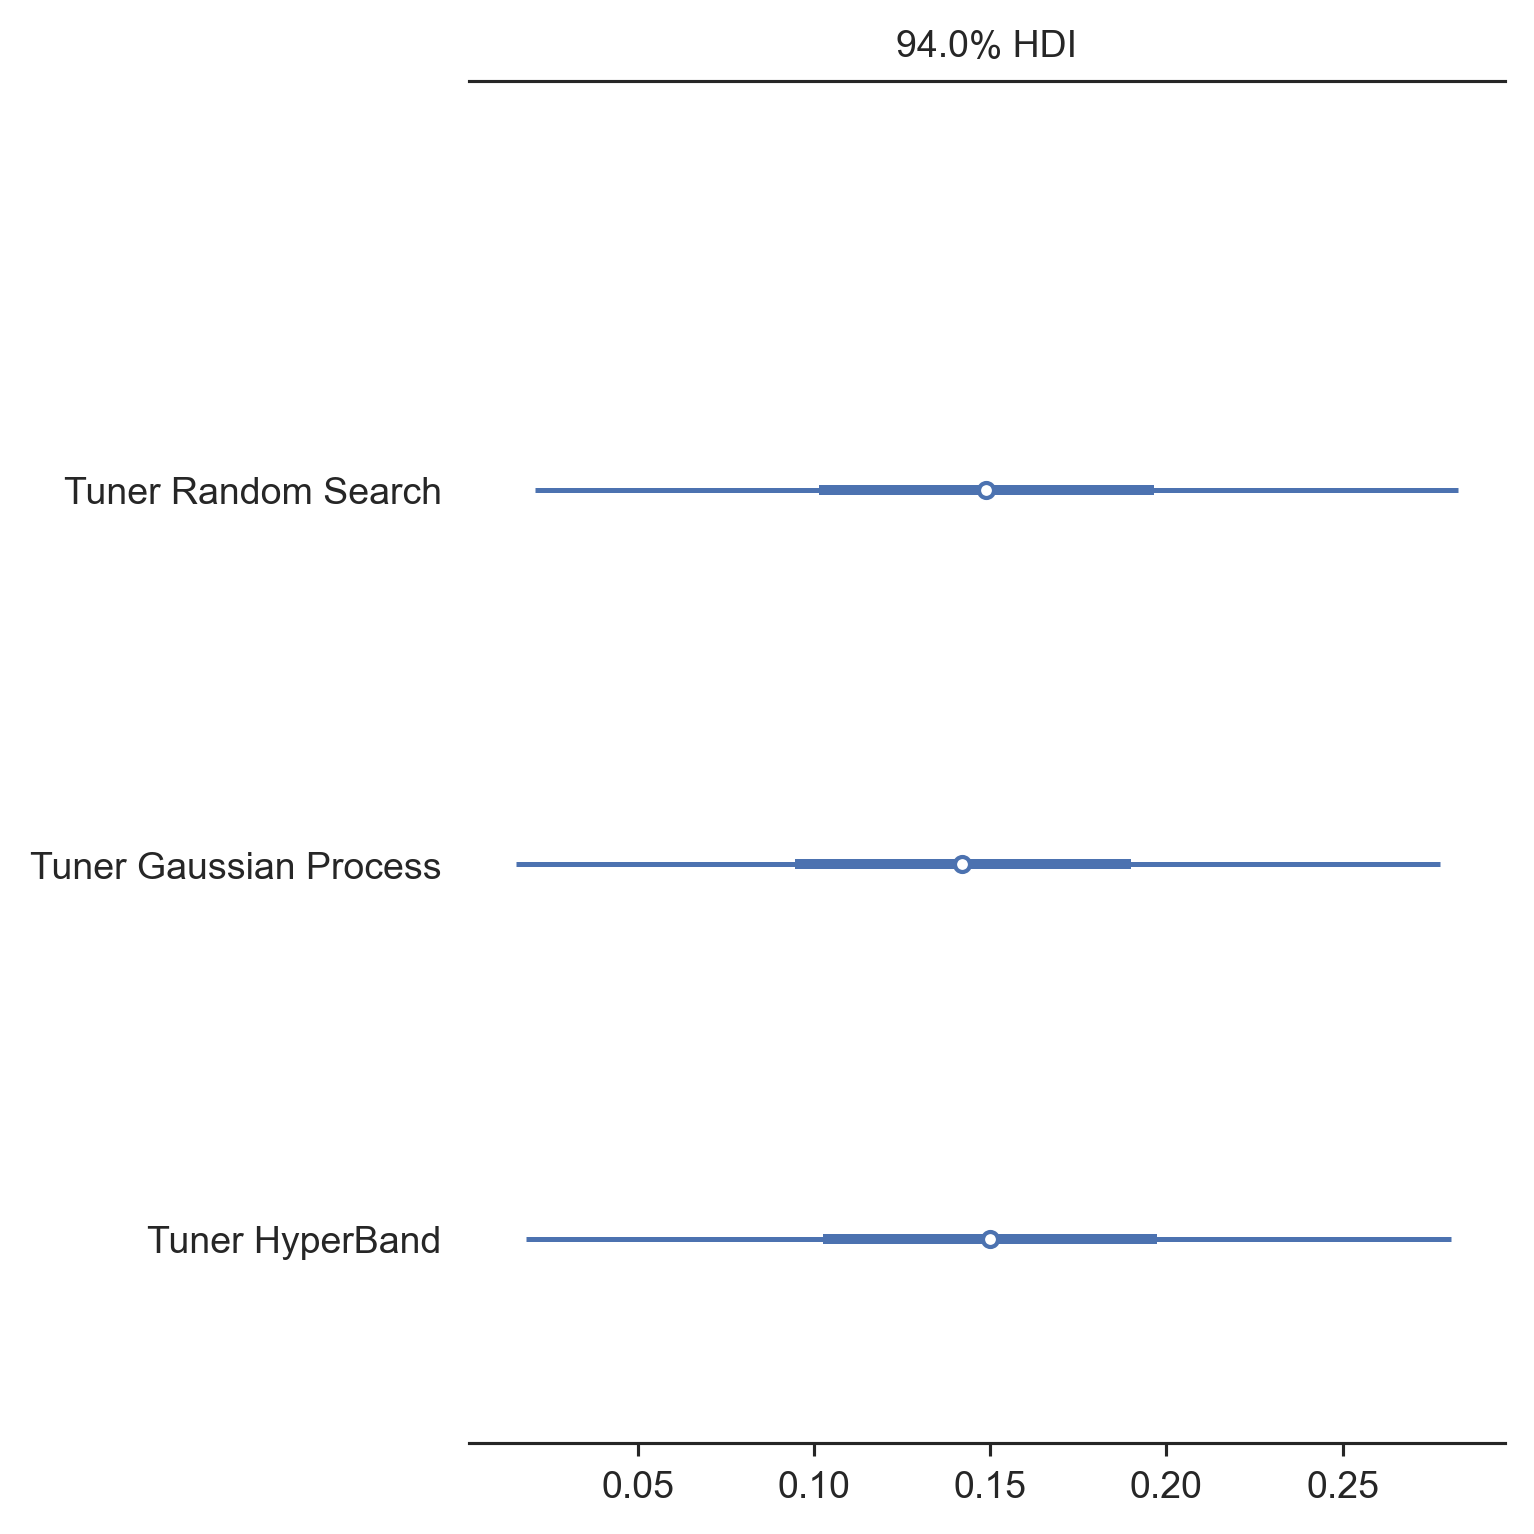

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Tuner, Context, hyper_sigma, hyper_normal]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 251 seconds.
There were 167 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7598952210846789, but should be close to 0.9. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


Recall
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Tuner[0]  0.158  0.068   0.022    0.283      0.007    0.005      90.0    90.0   
Tuner[1]  0.155  0.068   0.020    0.279      0.007    0.005      90.0    90.0   
Tuner[2]  0.156  0.068   0.019    0.279      0.007    0.005      90.0    90.0   

          ess_bulk  ess_tail  r_hat  
Tuner[0]      89.0    1865.0   1.04  
Tuner[1]      89.0    1867.0   1.04  
Tuner[2]      89.0    1909.0   1.04  


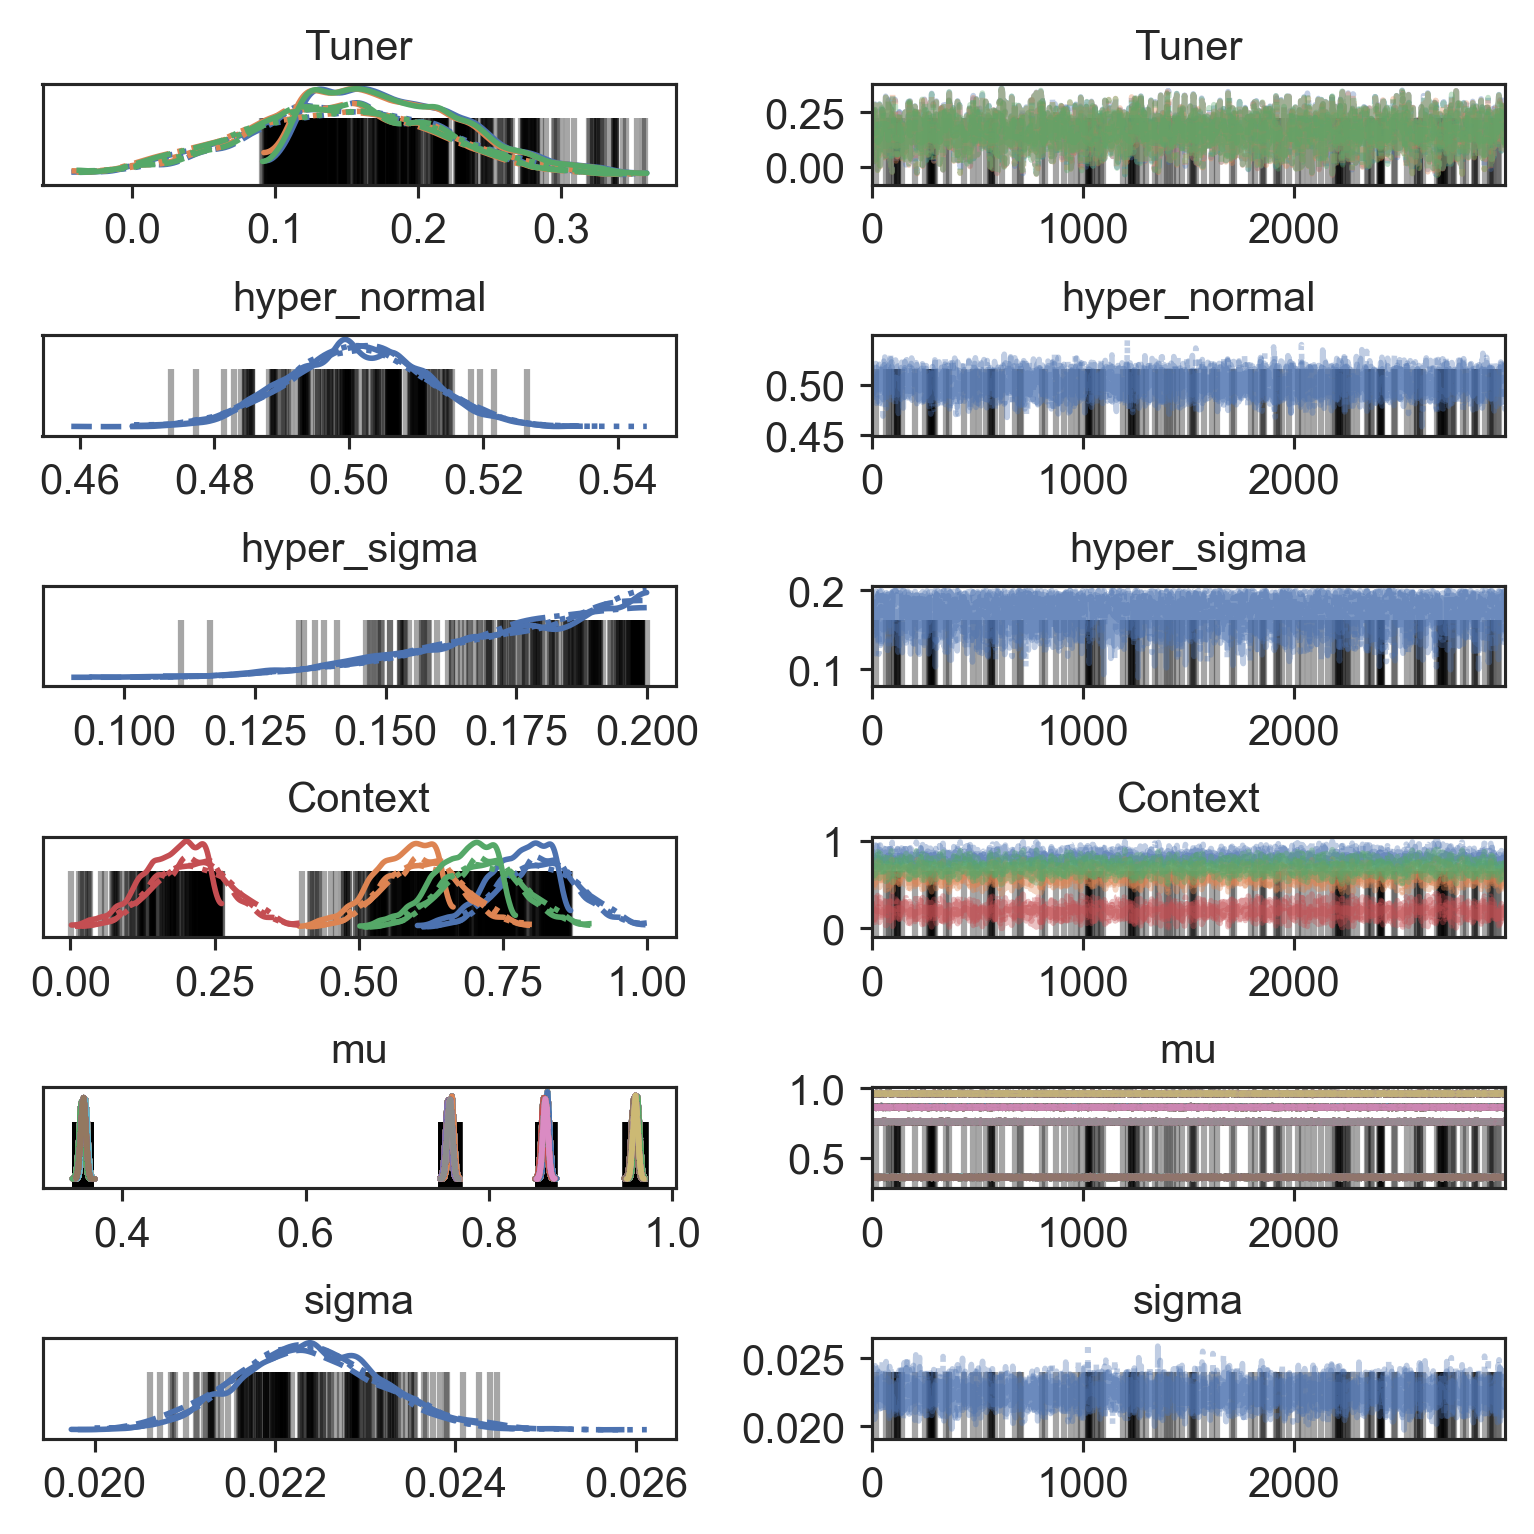

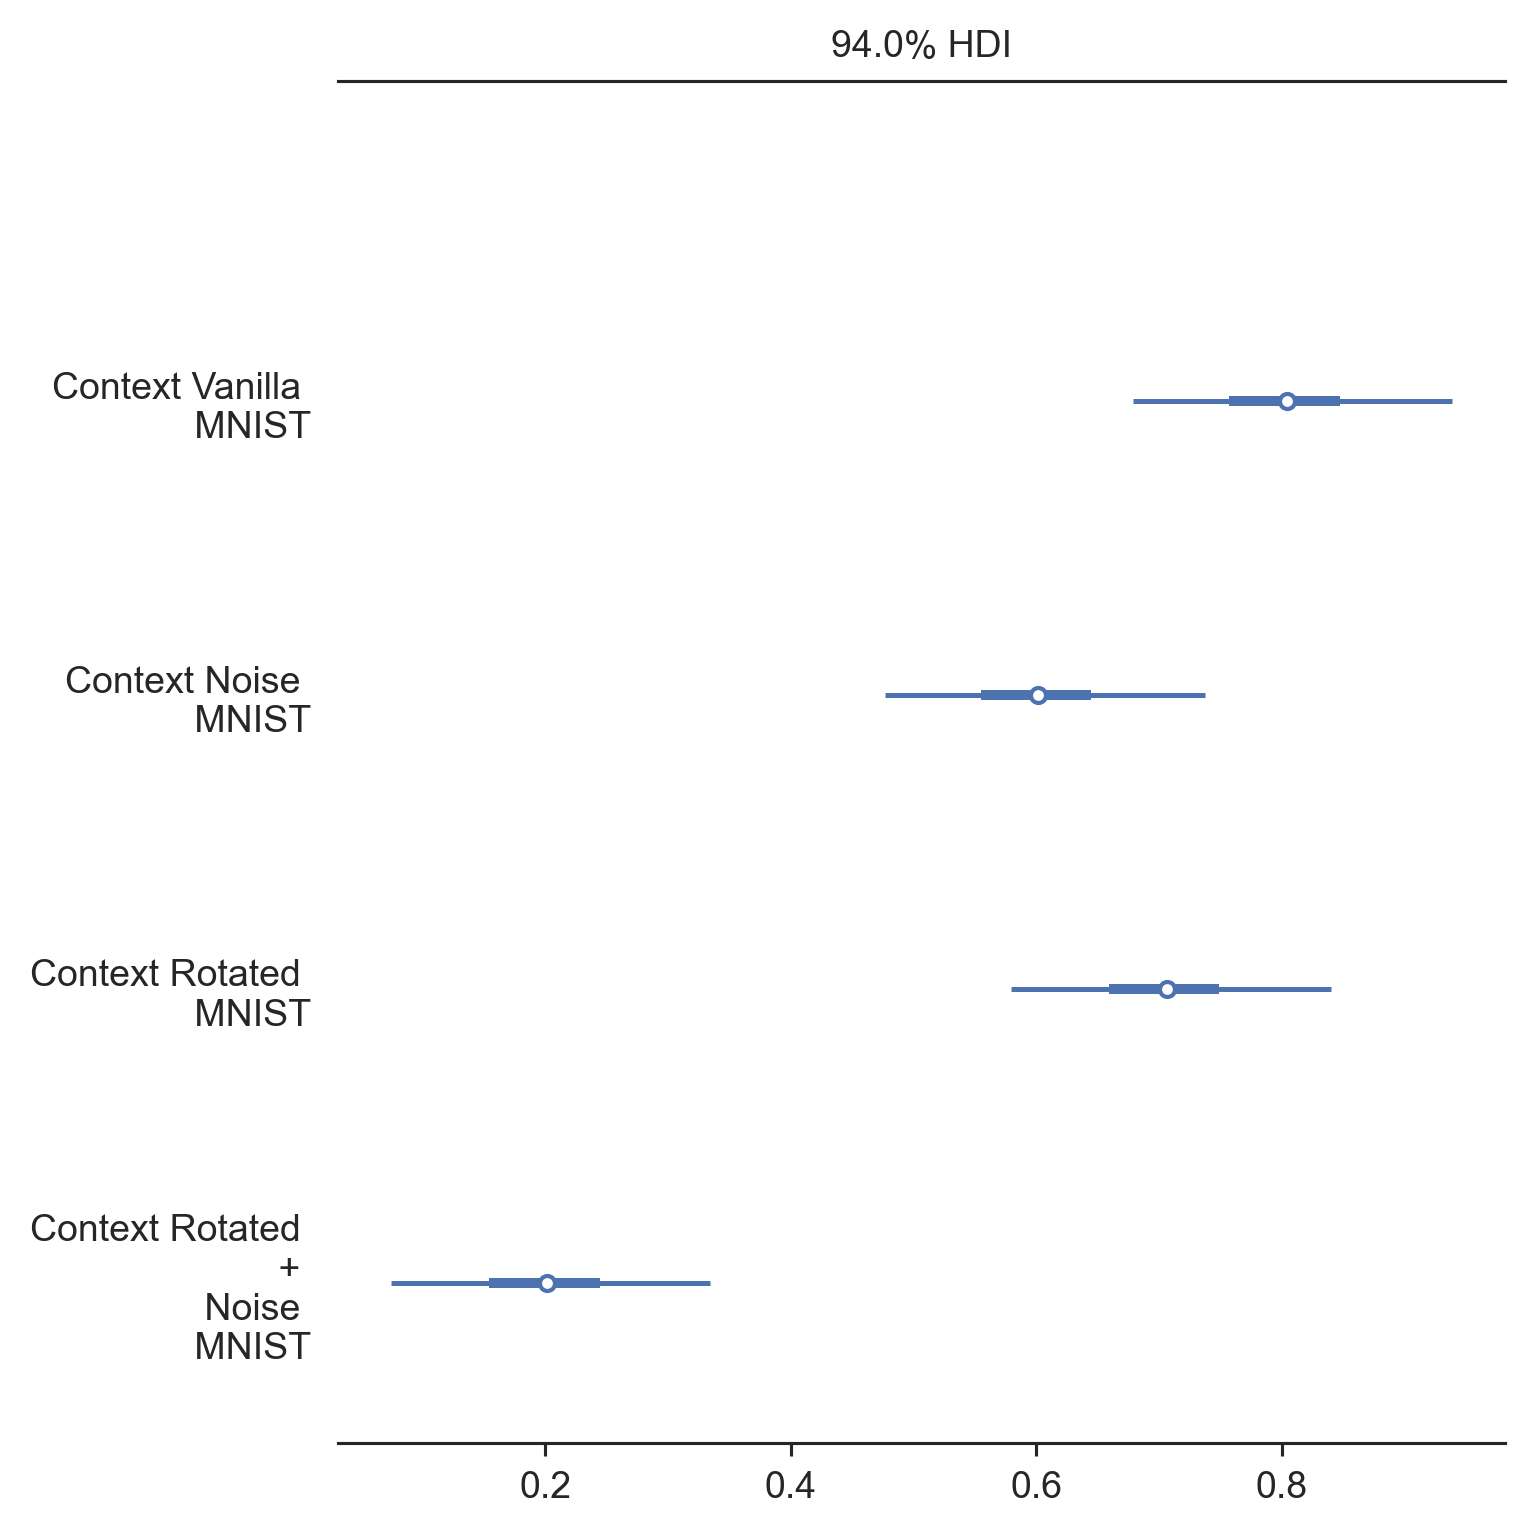

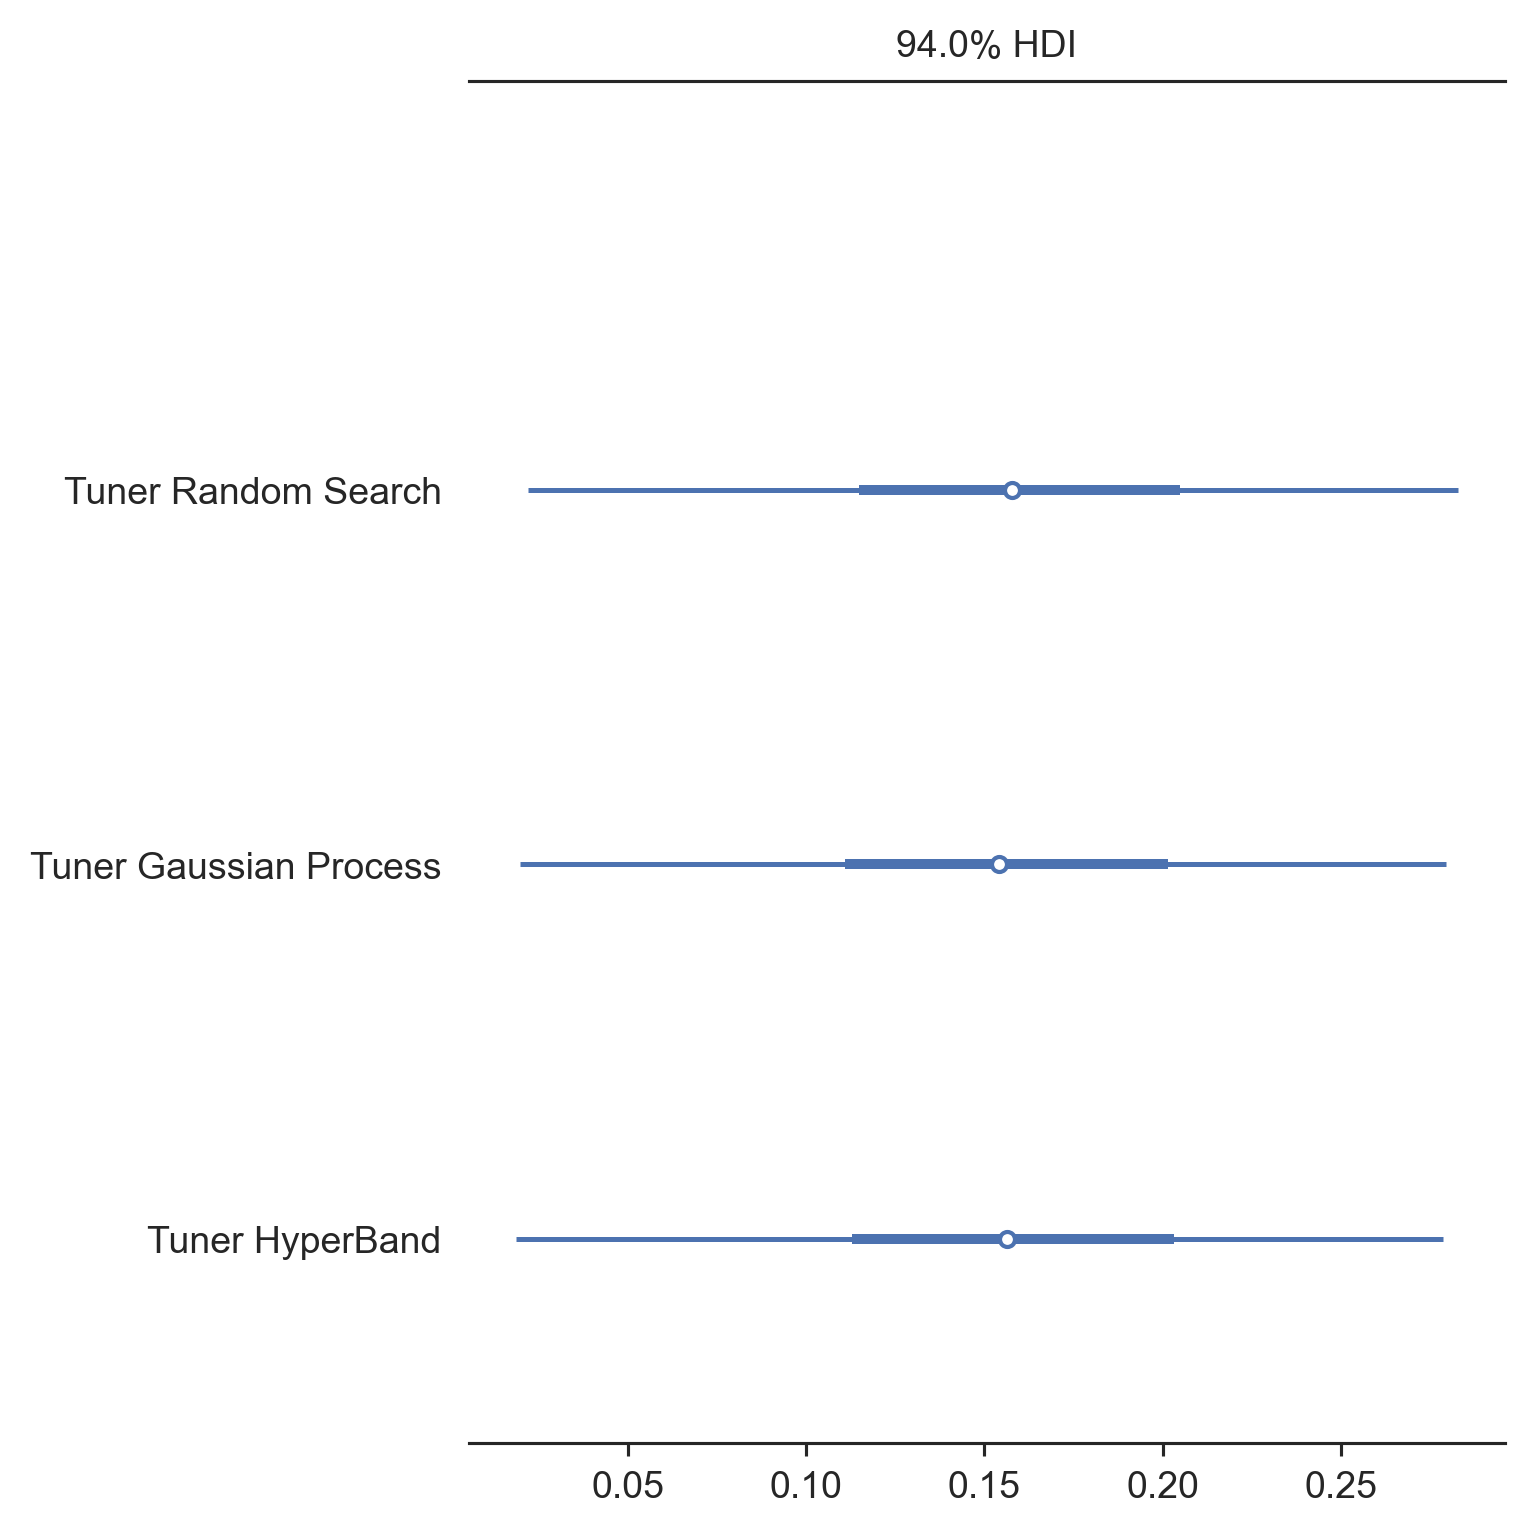

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Tuner, Context, hyper_sigma, hyper_normal]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 241 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


F1 Score
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Tuner[0]  0.147  0.068   0.012    0.267      0.002    0.001    2057.0  2057.0   
Tuner[1]  0.140  0.068   0.007    0.261      0.002    0.001    2056.0  2056.0   
Tuner[2]  0.144  0.068   0.013    0.267      0.002    0.001    2059.0  2059.0   

          ess_bulk  ess_tail  r_hat  
Tuner[0]    2032.0    2088.0    1.0  
Tuner[1]    2031.0    2070.0    1.0  
Tuner[2]    2036.0    2096.0    1.0  


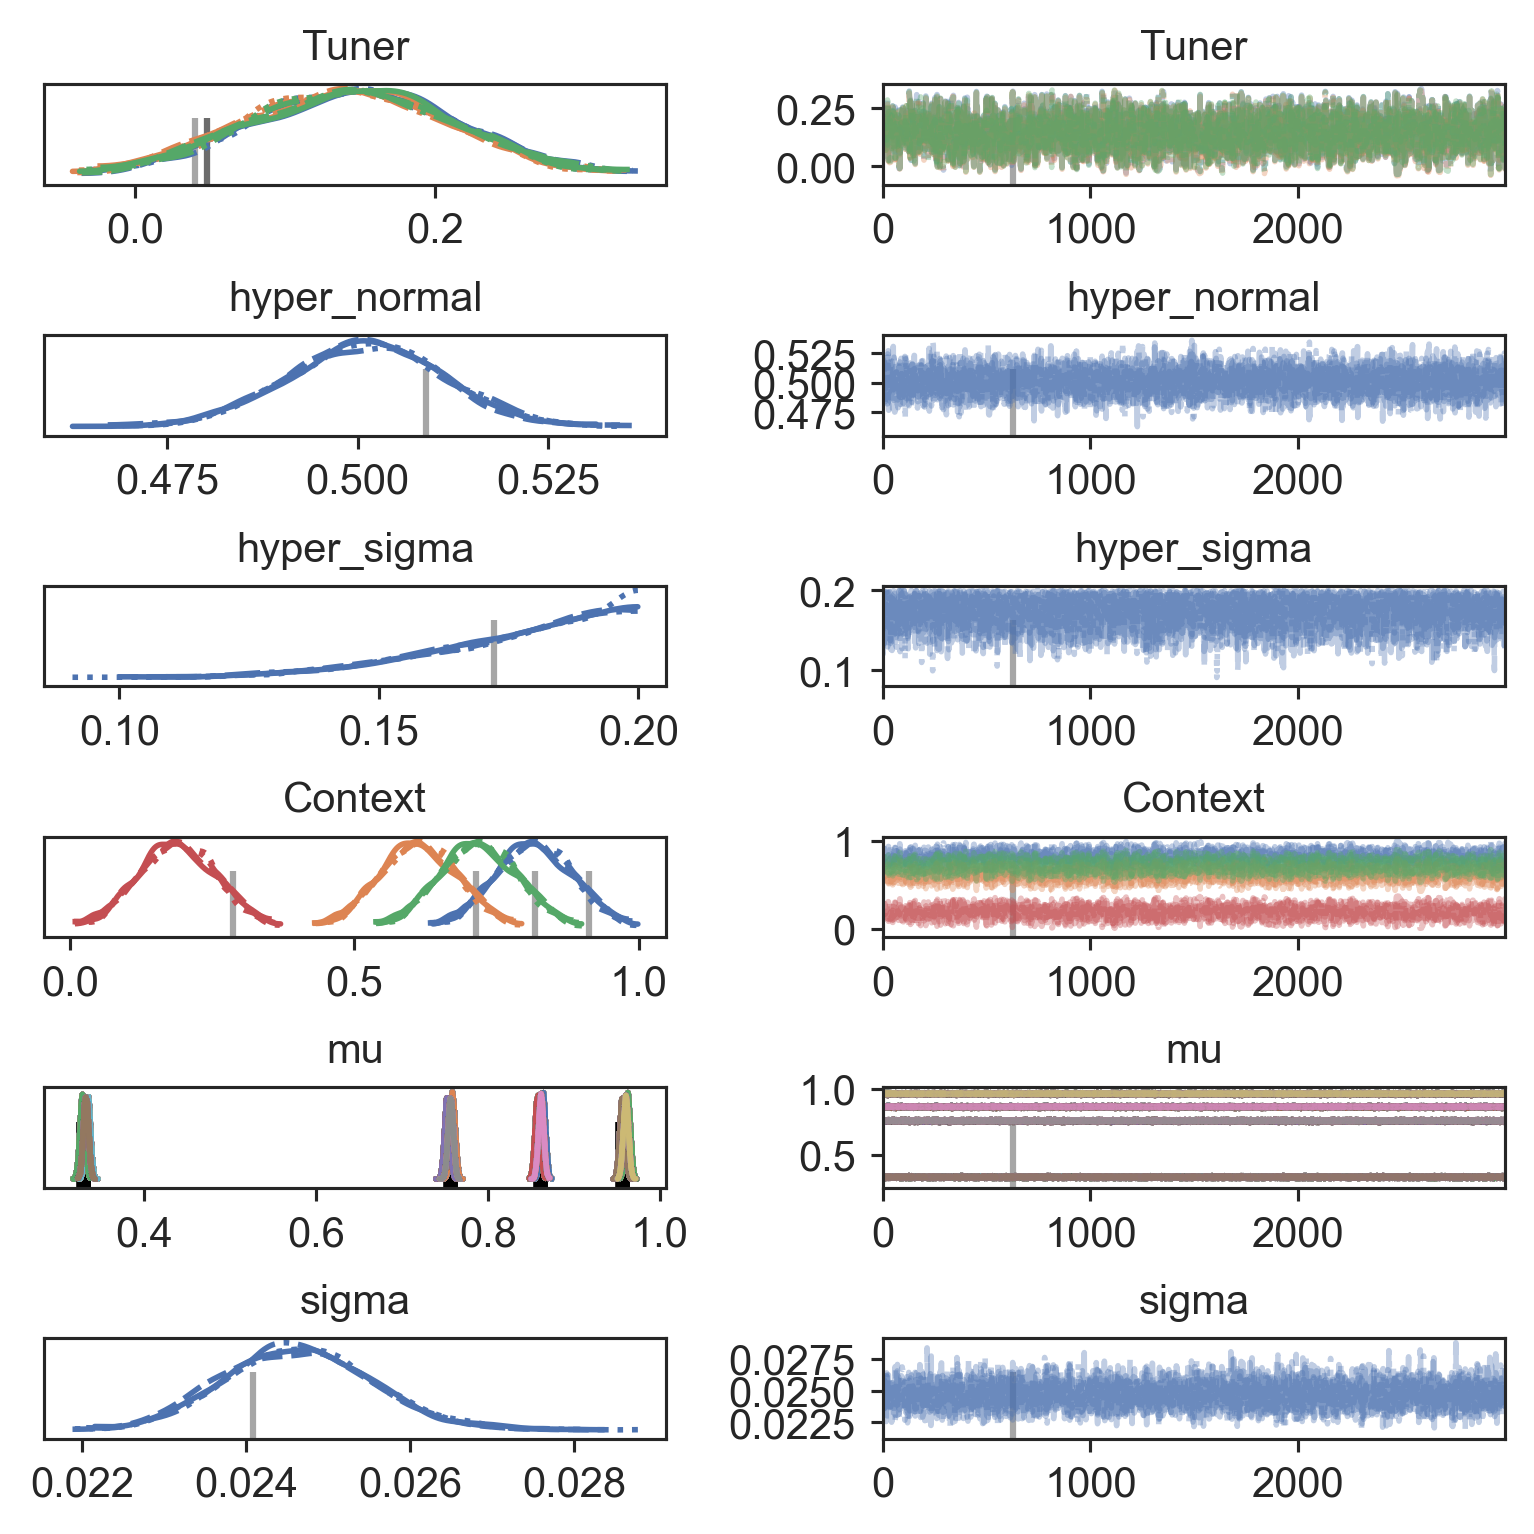

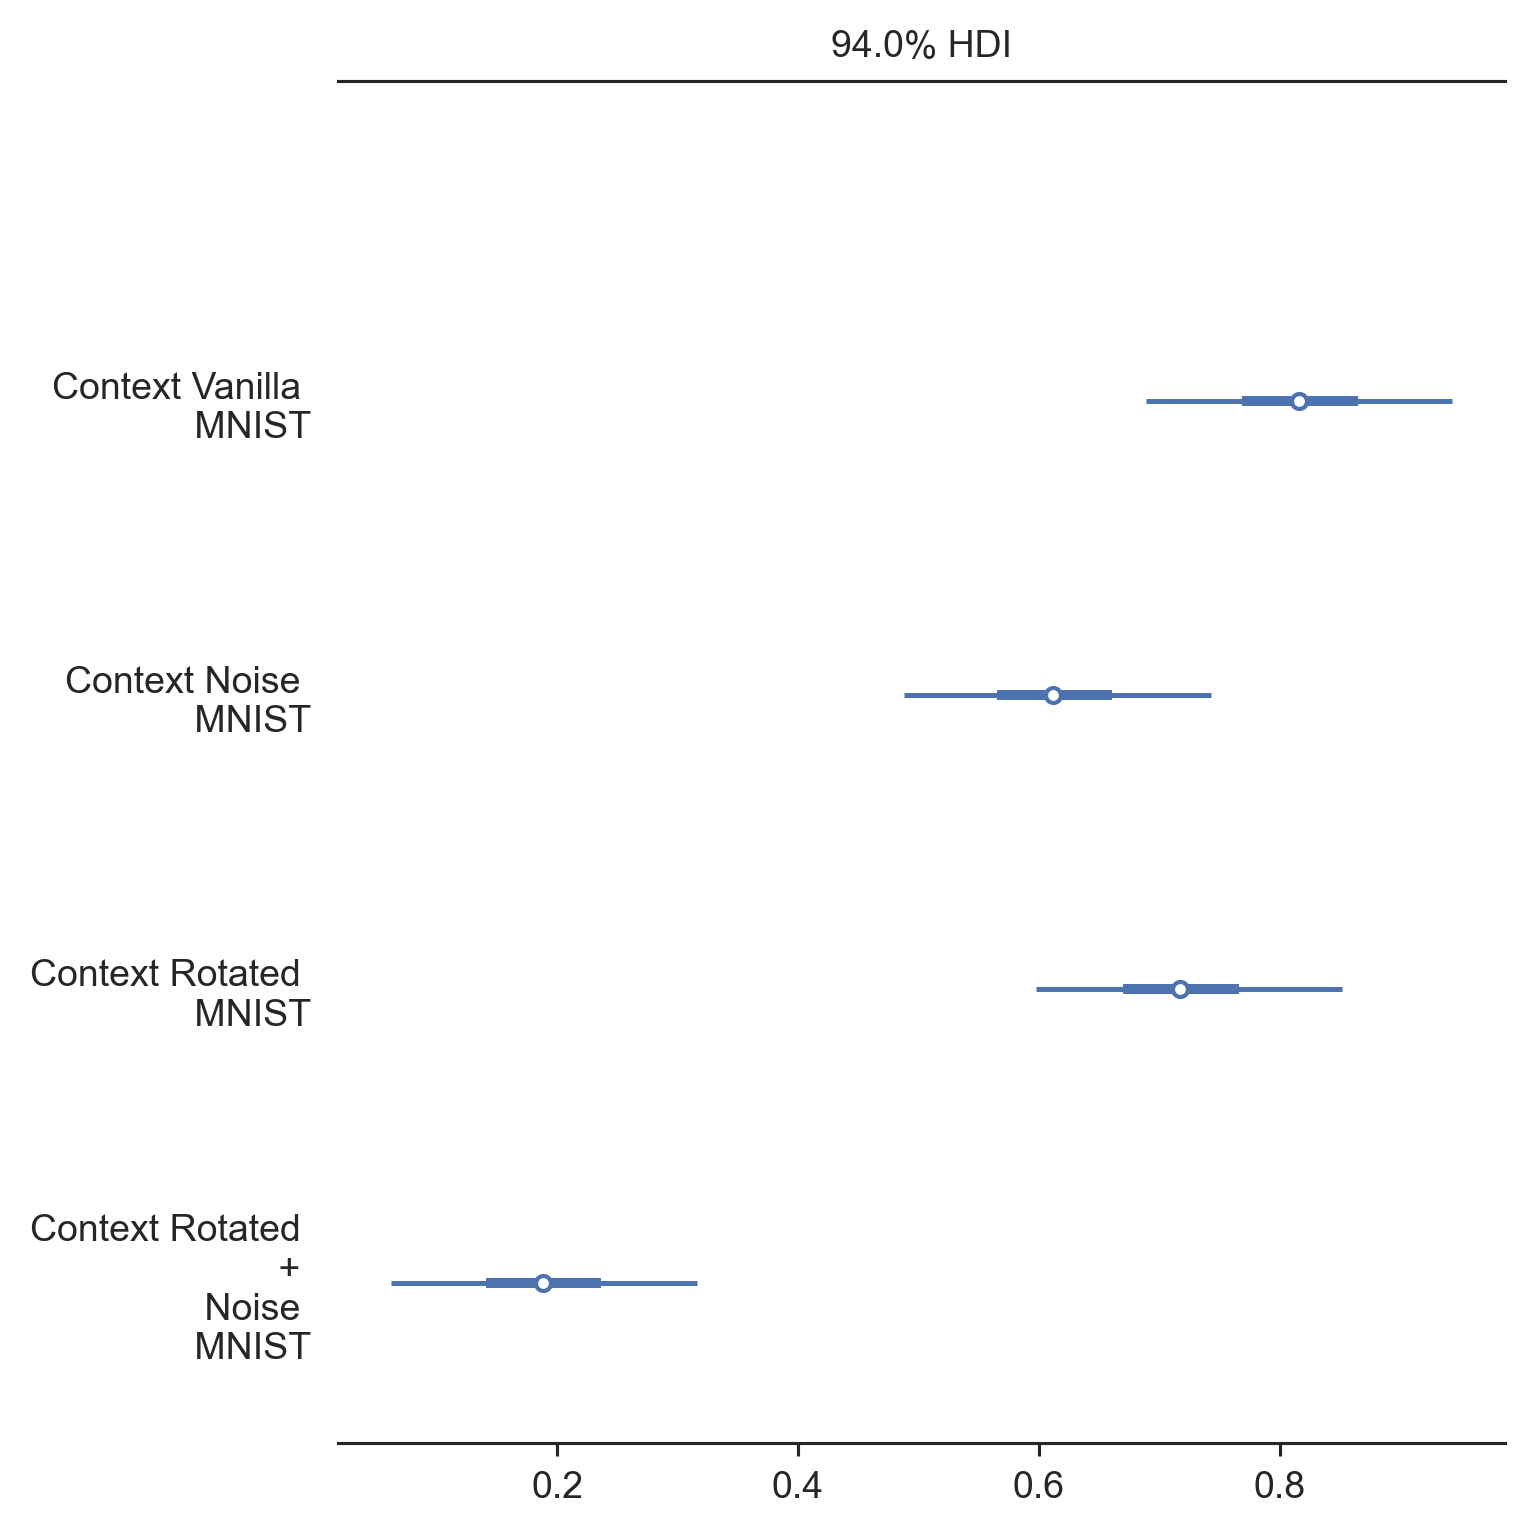

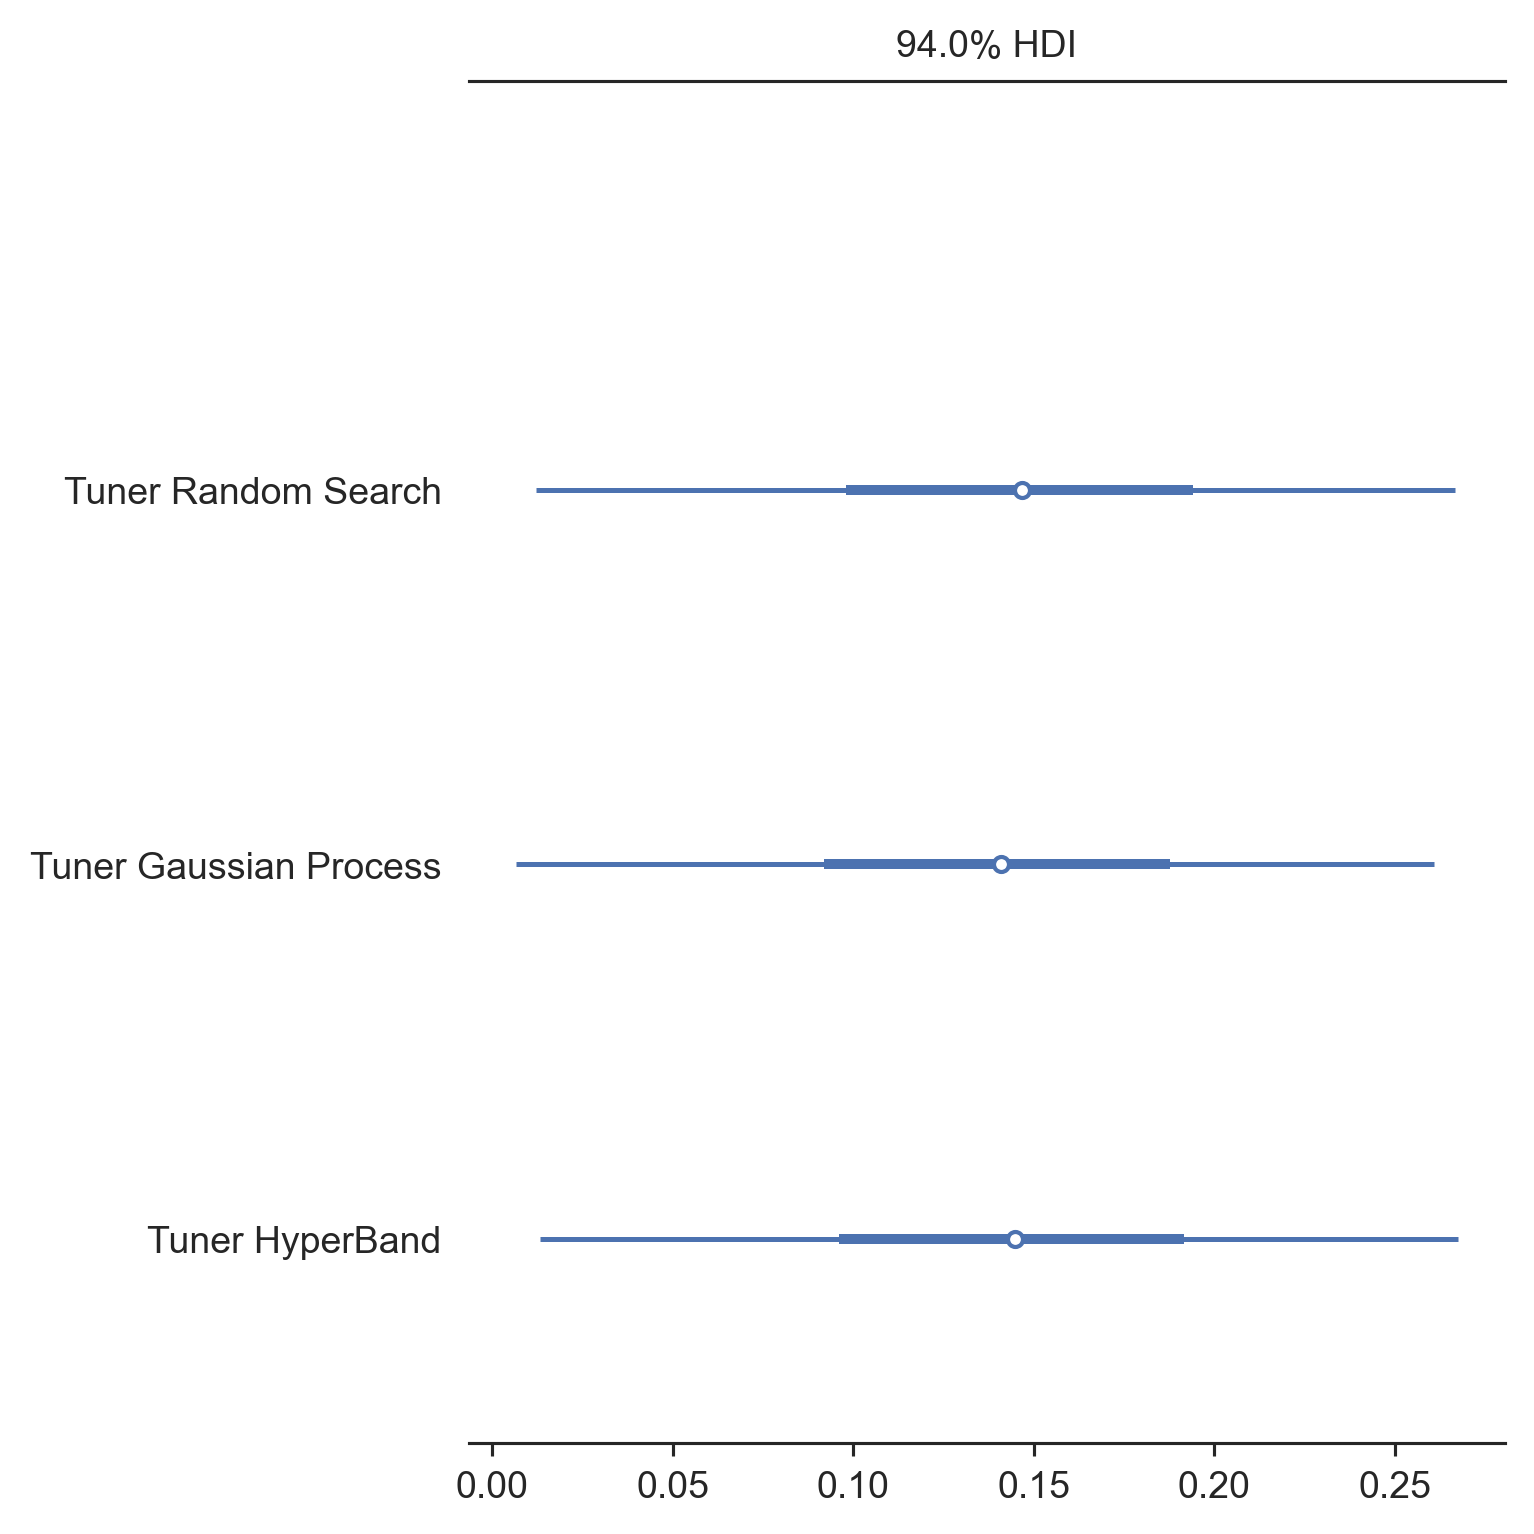

In [5]:
analyzer = GLMMPerformance(
    df=melted, 
    tuners_column='Tuner', 
    contexts_column='Source', 
    targets_column='metric'
)
analyzer.analyze(
    targets=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    draws=3000,
    tune=2000,
    target_accept=0.9
)